In [2]:
#All the needed libraries for the project
import pandas as pd
import numpy as np
import sys
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random

In [29]:
scaled_ble= pd.read_csv('datasets/Scaled_BLE_RSSI.csv')
distance = pd.read_csv('datasets/iBeacon_Distance.csv')

In [30]:
X = scaled_ble.values
y = distance.values

In [31]:
X = np.array(X)
X = np.reshape(X, (-1, ))
X.shape

(18460,)

In [32]:
y = np.array(y)
y = np.reshape(y, (-1, ))
y.shape[0]

18460

In [33]:
X = np.reshape(X, (-1,1 ))
y = np.reshape(y, (-1,1 ))
X[20,0] == 0.0

True

In [34]:
index = []
for i in range(0,X.shape[0]):
    if X[i,0] == 0.0:
        index.append(i)


X = np.delete(X, index)
y = np.delete(y, index)
X.shape

(2043,)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print( scaler.fit(X.reshape(-1, 1)))
Xs = scaler.transform(X.reshape(-1, 1))
from sklearn.preprocessing import quantile_transform
Xs = quantile_transform(X.reshape(-1, 1), n_quantiles=5)

StandardScaler(copy=True, with_mean=True, with_std=True)


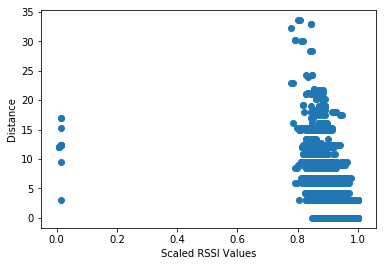

In [35]:
plt.scatter(X,y)
plt.ylabel('Distance')
plt.xlabel('Scaled RSSI Values')
plt.show()

In [36]:
y1

array([ 4.6168186 ,  6.66831094,  6.66831094, ...,  2.58230729,
        2.58230729,  2.58230729])

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(Xs, y,
                                                    test_size=0.15,
                                                   random_state=4)

In [38]:
regr_rf = DecisionTreeRegressor(max_depth=7,criterion='mse')
regr_rf.fit(X_train.reshape((-1,1)), y_train.reshape((-1,)))

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
regr_rf.predict(0.9996)

array([ 1.15384615])

In [40]:
regr_rf.score(X_test.reshape((-1,1)), y_test)

0.25641986022935048